In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import warnings

warnings.filterwarnings("ignore")

In [2]:
# JHU CSSE Covid-19 Global Daily Reports
# The daily reports are located under the directory on Github:
csse_base_dir = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/"
csse_sub_dir = "csse_covid_19_daily_reports/"
# c.f. main repository: 
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
# Each .csv file is named using the update date in MM-DD-YYYY format:
file_name = "06-28-2020.csv"
csse_data_2 = pd.read_csv(os.path.join(csse_base_dir, csse_sub_dir, file_name))
display(csse_data_2.head())

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-29 04:33:44,34.223334,-82.461707,103,0,0,103,"Abbeville, South Carolina, US",419.945366,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-29 04:33:44,30.295065,-92.414197,812,36,0,776,"Acadia, Louisiana, US",1308.727536,4.433498
2,51001.0,Accomack,Virginia,US,2020-06-29 04:33:44,37.767072,-75.632346,1039,14,0,1025,"Accomack, Virginia, US",3215.125634,1.347449
3,16001.0,Ada,Idaho,US,2020-06-29 04:33:44,43.452658,-116.241552,1841,23,0,1818,"Ada, Idaho, US",382.277761,1.249321
4,19001.0,Adair,Iowa,US,2020-06-29 04:33:44,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


In [3]:
# Read data from multiple files to obtain time series for a particular location.
start_date = "2020-01-01"
end_date = "2021-07-11"

start_date = pd.to_datetime(start_date, format = "%Y-%m-%d")
end_date = pd.to_datetime(end_date, format = "%Y-%m-%d")

In [13]:
# Load the .csv data files from GitHub.

def load_csse_data(start_date, end_date, state, country):
    wanted_columns = ["Date", "Province_State", "Country_Region", "Last_Update", "Confirmed", "Active", "Deaths", "Recovered"]
    df = pd.DataFrame([])
    for d in pd.date_range(start_date, end_date):
        f_name = os.path.join(csse_base_dir, csse_sub_dir, d.strftime(format = "%m-%d-%Y") + ".csv")
        try:
            tmp_df = pd.read_csv(f_name)
            tmp_df = tmp_df[(tmp_df["Province_State"] == state) & (tmp_df["Country_Region"] == country)]
            tmp_df["Date"] = d
            tmp_df["Last_Update"] = tmp_df["Last_Update"].apply(lambda x: pd.to_datetime(x, format = "%Y-%m-%d"))
            tmp_df = tmp_df[wanted_columns]
            df = df.append(tmp_df)
        except:
            pass
    df = df.reset_index().drop("index", axis = 1)
    return df

df = load_csse_data(start_date, end_date, "Tokyo", "Japan")
# Calculate the daily new cases.
df["daily_cases"] = df["Confirmed"].diff().fillna(0)
# Calculate the 7 day moving average of the daily new cases
df["avg_daily_cases"] = df["daily_cases"].rolling(window = 7).mean().fillna(0)

In [14]:
display(df)

,Date,Province_State,Country_Region,Last_Update,Confirmed,Active,Deaths,Recovered,daily_cases,avg_daily_cases
0,2020-05-28,Tokyo,Japan,2020-05-29 02:32:50,5199,457.0,299.0,4443.0,0.0,0.000000
1,2020-05-29,Tokyo,Japan,2020-05-30 02:32:48,5221,418.0,302.0,4501.0,22.0,0.000000
2,2020-05-30,Tokyo,Japan,2020-05-31 02:32:45,5235,423.0,304.0,4508.0,14.0,0.000000
3,2020-05-31,Tokyo,Japan,2020-06-01 02:32:46,5240,425.0,305.0,4510.0,5.0,0.000000
4,2020-06-01,Tokyo,Japan,2020-06-02 02:33:08,5253,409.0,305.0,4539.0,13.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
404,2021-07-06,Tokyo,Japan,2021-07-07 04:21:20,177504,5554.0,2225.0,169725.0,593.0,602.285714
405,2021-07-07,Tokyo,Japan,2021-07-08 04:21:26,178424,5936.0,2228.0,170260.0,920.0,631.714286
406,2021-07-08,Tokyo,Japan,2021-07-09 04:21:21,179320,6338.0,2230.0,170752.0,896.0,663.571429
407,2021-07-09,Tokyo,Japan,2021-07-10 04:21:25,180142,6589.0,2232.0,171321.0,822.0,686.714286


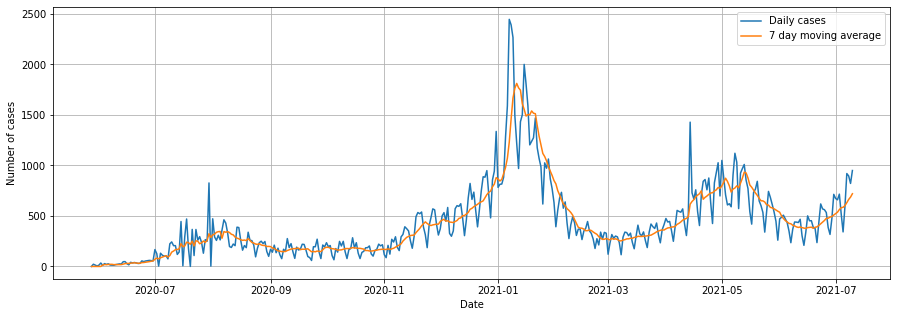

In [19]:
plt.figure(figsize = (15, 5))
plt.plot(df["Date"], df["daily_cases"])
plt.plot(df["Date"], df["avg_daily_cases"])
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.legend(["Daily cases", "7 day moving average"])
plt.show()